# <font color='indianred'> LA POULE QUI CHANTE </font>
##MISSION : Analyse pour le lancement à l’international en groupant les pays à cibler pour exporter nos poulets

1ère partie : Prétraitement des données


2ème partie : Analyse par 
<li>ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus</li>
<li>Méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering et analyse des centroides des classes</li>
<li>Classification ascendante hiérarchique avec un dendrogramme comme visualisation</li>


# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation des jeux de données</a>
 
**Partie 2 : Analyse des jeux de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes des jeux de données </a>
 - <a href="#C4">Affichage des informations des jeux de données </a>
 - <a href="#C5">Analyse des valeurs manquantes</a>
 - <a href="#C6">Unicité de la clé primaire</a>
 - <a href="#C7">Analyse des doublons</a>

# **<font color='indianred'>Partie 1 : Importation des données</font></a>**

# <a name="C1"><font color='LightSeaGreen'>Importation des librairies</font></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

# <a name="C2"><font color='LightSeaGreen'>Importation des données</font></a>

In [2]:
uploaded = files.upload()

Saving DisponibiliteAlimentaire_2017.csv to DisponibiliteAlimentaire_2017.csv
Saving Population_2000_2018.csv to Population_2000_2018.csv


In [5]:
df_dispo=pd.read_csv(io.BytesIO(uploaded['DisponibiliteAlimentaire_2017.csv'])) 
df_dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [9]:
df_pop=pd.read_csv(io.BytesIO(uploaded['Population_2000_2018.csv'])) 
df_pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


# **<font color='indianred'>Partie 2 : Analyse des jeux de données</font></a>**

# <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes des jeux de données</font></a>

In [10]:
#nombre de lignes et colonnes
print('Disponibilité alimentaire',df_dispo.shape)
print('Population',df_pop.shape)

Disponibilité alimentaire (176600, 14)
Population (4411, 15)


# <a name="C4"><font color='LightSeaGreen'>Affichage des informations des jeux de données</font></a>

In [11]:
print('Table Disponibilité Alimentaire')
df_dispo.info()
print('\n')
print('Table Population')
df_pop.info()
print('\n')


Table Disponibilité Alimentaire
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  o

# <a name="C5"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [12]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',round((df.isna().sum()*100/df.shape[0]),2).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          round((df.isna().sum()*100/df.shape[0]),2).sort_values(ascending=True))
    print('\n')
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isna(), cbar=False)

1-Table disponibilité alimentaire :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 2472400
Pourcentage de valeurs manquantes =  0.0 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 0.0    14
dtype: int64


Pourcentage de valeurs manquantes par variable/colonne =
 Code Domaine              0.0
Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64


---------------------------------------
2-Table population :
Nombre de valeurs manquantes = 4153
Nombre de cellulles totales = 66165
Pourcentage de valeurs manquantes =  6.28 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 94.15     1
0.00     

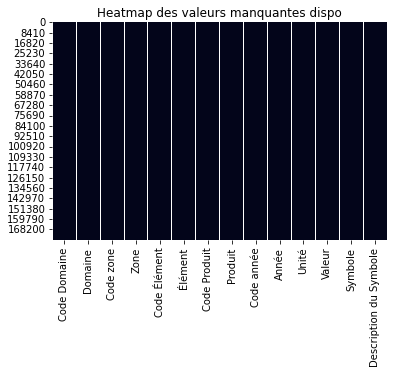

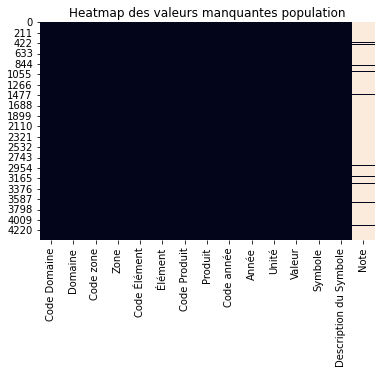

In [13]:
#Appel de la fonction val_manq 
#Affichage des pourcentages de valeurs manquantes des 2 jeux de données 
print('1-Table disponibilité alimentaire :')
val_manq(df_dispo)
plt.title("Heatmap des valeurs manquantes dispo")
print('---------------------------------------')
print('2-Table population :')
val_manq(df_pop)
plt.title("Heatmap des valeurs manquantes population")
print('---------------------------------------')

# <a name="C6"><font color='LightSeaGreen'>Unicité de la clé primaire</font></a>

In [14]:
#Creation d'une fonction qui teste l'unicité d'une colonne
def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable', col, 'n\'est pas une clé primaire')

In [15]:
cle_primaire(df_dispo,'Code Domaine')
cle_primaire(df_pop,'Code Domaine')

La variable Code Domaine n'est pas une clé primaire
La variable Code Domaine n'est pas une clé primaire


# <a name="C7"><font color='LightSeaGreen'>Analyse des doublons</font></a>

In [16]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [17]:
print('------------------') 
print('Table disponibilité alimentaire')
detect_doublons(df_dispo)
print('------------------') 
print('Table population')
detect_doublons(df_pop)

------------------
Table disponibilité alimentaire
------------------
La table contient 0 doublons.
(0, 14)


Empty DataFrame
Columns: [Code Domaine, Domaine, Code zone, Zone, Code Élément, Élément, Code Produit, Produit, Code année, Année, Unité, Valeur, Symbole, Description du Symbole]
Index: []


------------------
Table population
------------------
La table contient 0 doublons.
(0, 15)


Empty DataFrame
Columns: [Code Domaine, Domaine, Code zone, Zone, Code Élément, Élément, Code Produit, Produit, Code année, Année, Unité, Valeur, Symbole, Description du Symbole, Note]
Index: []


